# Prediksi Konsumsi Energi

Here is the Case: Seorang manajer gedung ingin mengoptimalkan konsumsi energi di berbagai jenis bangunan yang dikelolanya. Namun, ia mengalami kesulitan dalam memahami pola konsumsi energi dan faktor apa saja yang mempengaruhi penggunaannya. Manajer tersebut memiliki dataset CSV yang berisi informasi tentang jenis bangunan, luas bangunan, jumlah penghuni, peralatan yang digunakan, suhu rata-rata, dan hari dalam seminggu. Sebagai seorang machine learning engineer, apa yang akan kalian lakukan supaya dapat memberikan prediksi konsumsi energi berdasarkan karakteristik bangunan dan faktor lingkungan kepada manajer tersebut?

Data Understanding: Building Type: Categorical feature representing the type of buildingSquare Footage: Numeric feature representing the total square footage of the building Number of Occupants: Numeric feature indicating the number of people occupying the building Appliances Used: Numeric feature representing the number of appliances used in the building Average Temperature: Numeric feature representing the average temperature of the building or climate area (in Celsius) Day of Week: Categorical feature representing whether the data point corresponds to a weekday or weekend Energy Consumption: Numeric target variable representing the energy consumption of the building in kWh (kilowatt-hours). This is the value the model is tasked with predicting.

# Data Preparation

## Import Library

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn.preprocessing import MinMaxScaler, StandardScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

## Upload Dataset

In [105]:
from google.colab import files

uploaded = files.upload()

Saving energy_data.csv to energy_data (3).csv


## Pengumpulan Data

In [106]:
df = pd.read_csv("/content/energy_data.csv")
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17
...,...,...,...,...,...,...,...
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98


## Identifikasi Setiap Fitur/Kolom

In [107]:
df.shape

(1000, 7)

## Mendeskripsikan Data

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [109]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


## Ada Missing Value Kah?

In [110]:
df.isnull().sum()

,0
Building Type,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Day of Week,0
Energy Consumption,0


## Ada Outlier kah?

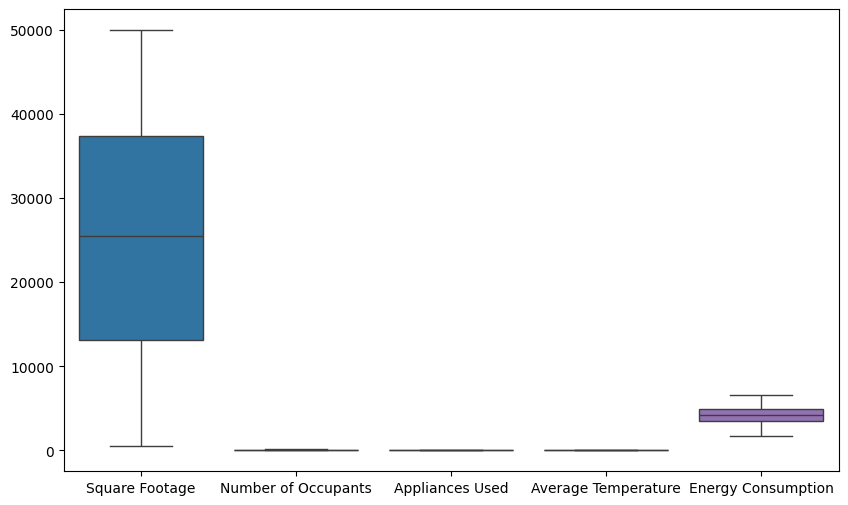

Outlier di Square Footage:
Outlier di Number of Occupants:
Outlier di Appliances Used:
Outlier di Average Temperature:
Outlier di Energy Consumption:


In [111]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature', 'Energy Consumption']])
plt.show()

numeric_cols = [
    'Square Footage',
    'Number of Occupants',
    'Appliances Used',
    'Average Temperature',
    'Energy Consumption'
]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outlier di {col}:")

## Adakah Data Yang Ganda (Duplicate Row)

In [112]:
df.duplicated().sum()

np.int64(0)

## Univariate, Bivariate, & Multivariate Analysis

### Univariate Analysis

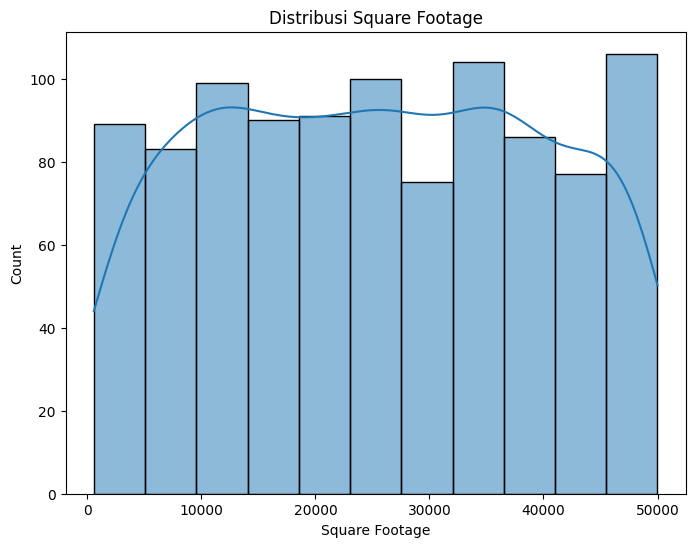

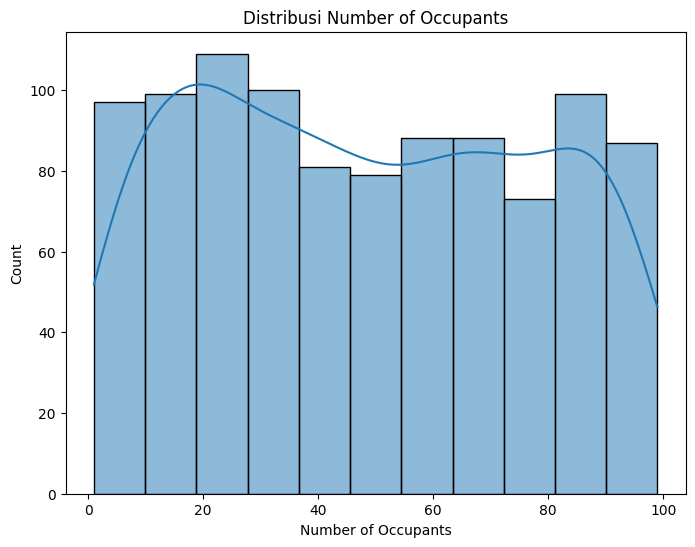

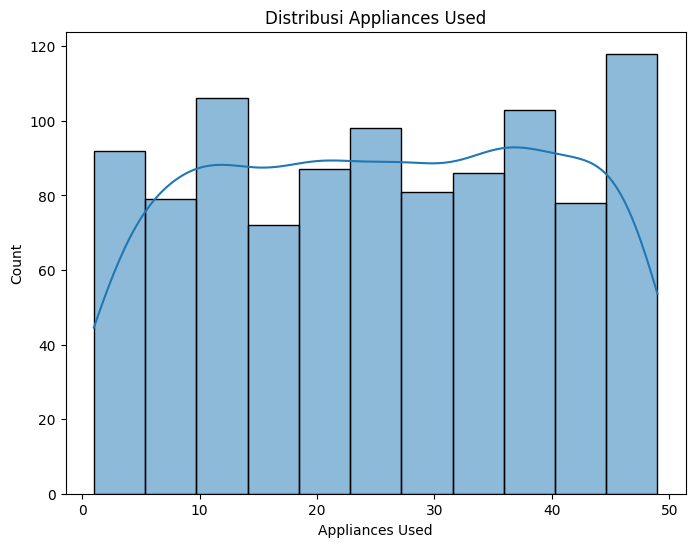

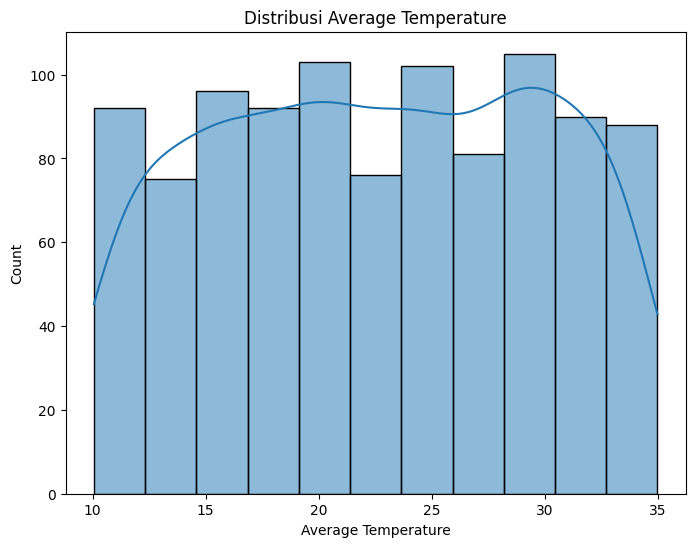

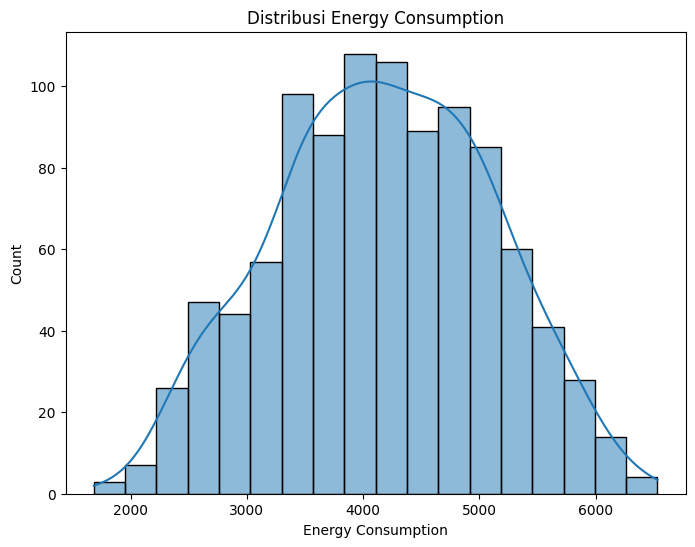

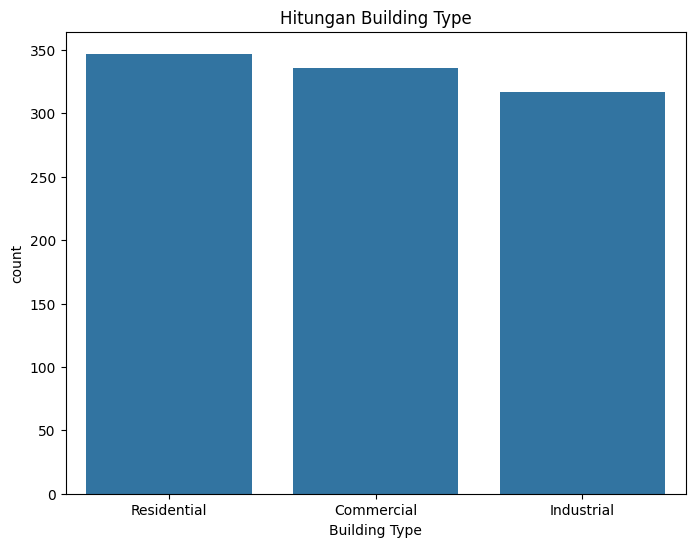

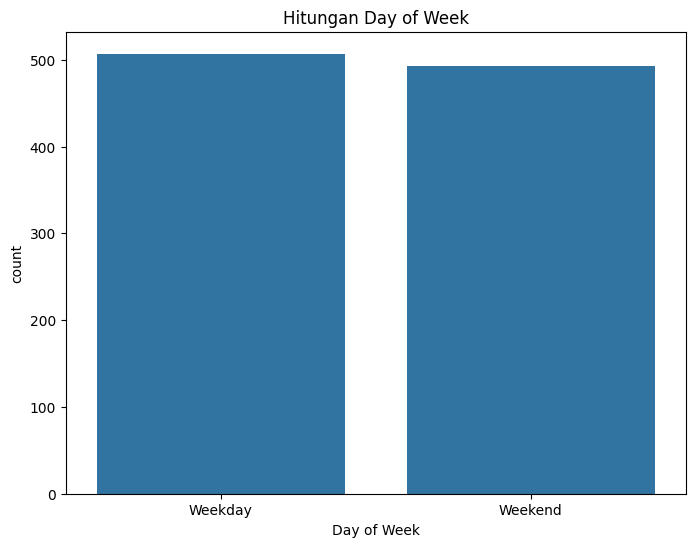

In [113]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

for col in ['Building Type', 'Day of Week']:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Hitungan {col}')
    plt.show()

### Bivariate Analysis

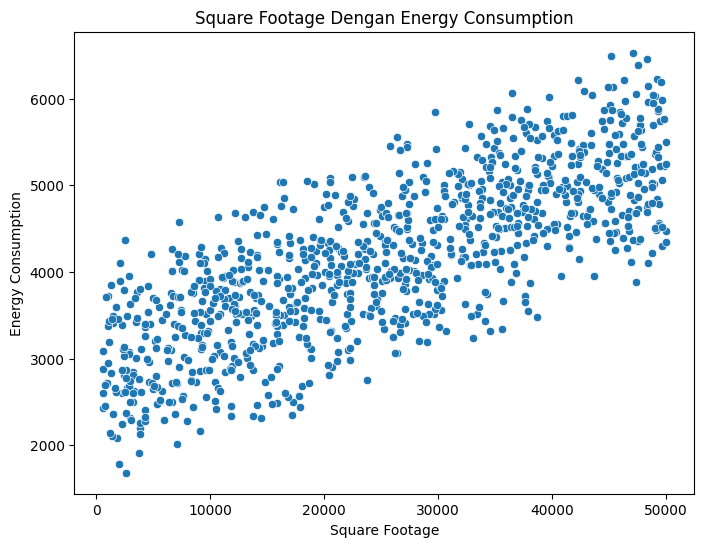

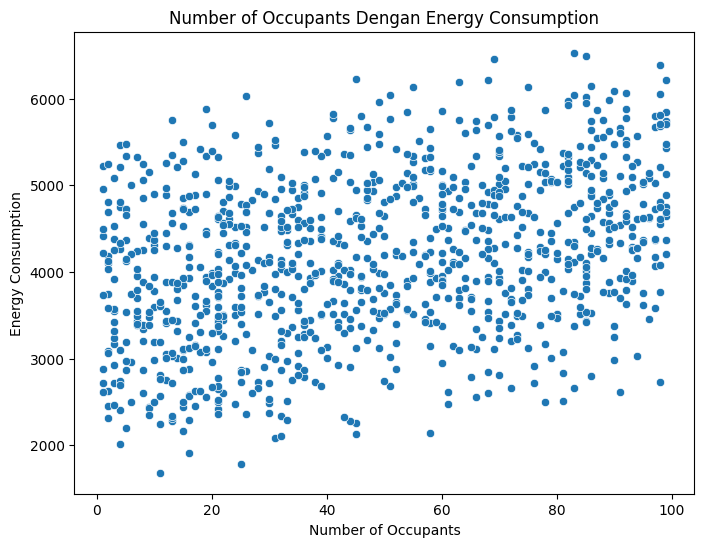

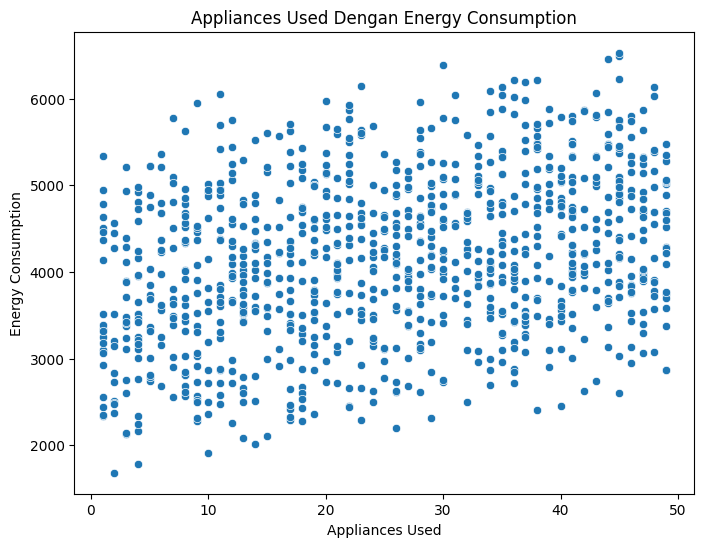

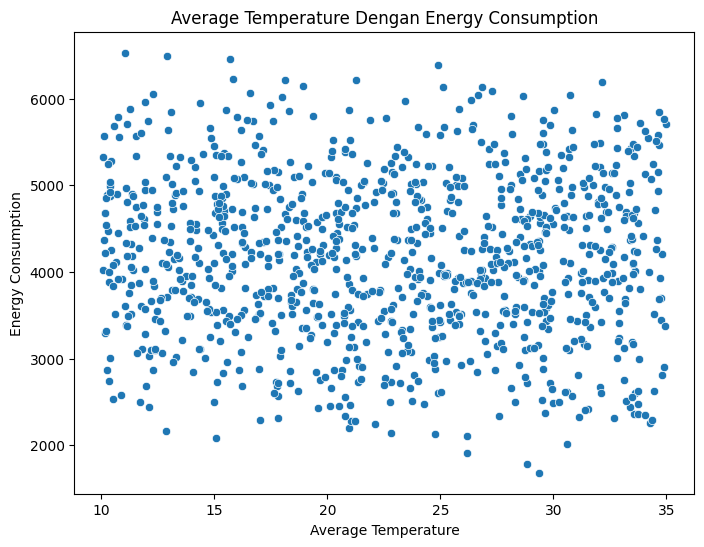

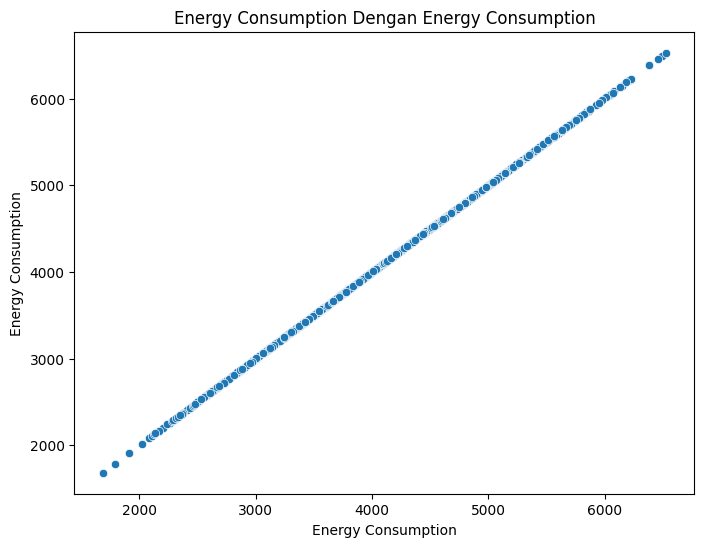

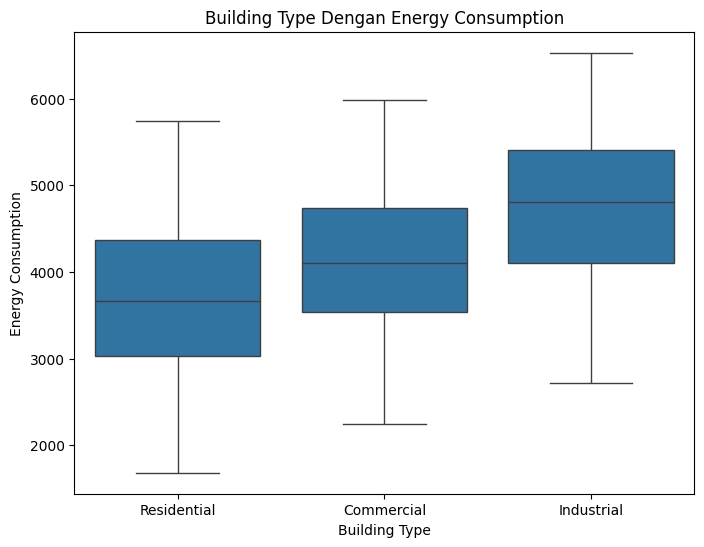

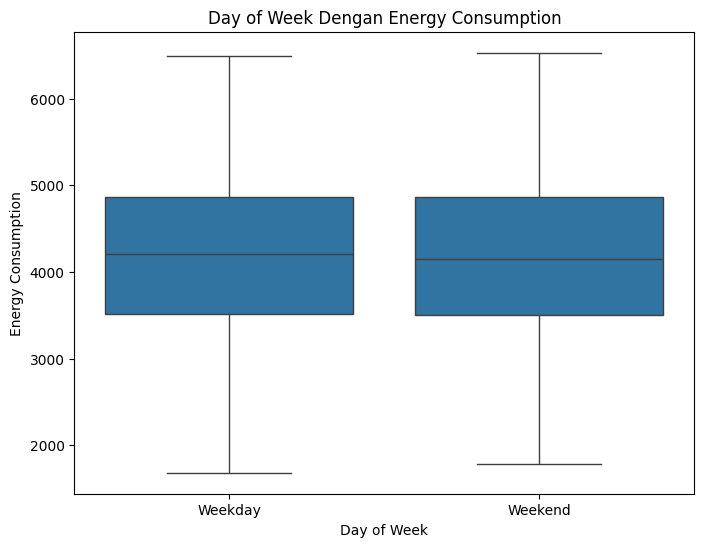

In [114]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='Energy Consumption', data=df)
    plt.title(f'{col} Dengan Energy Consumption')
    plt.show()

for col in ['Building Type', 'Day of Week']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='Energy Consumption', data=df)
    plt.title(f'{col} Dengan Energy Consumption')
    plt.show()

### Multivariate Analysis

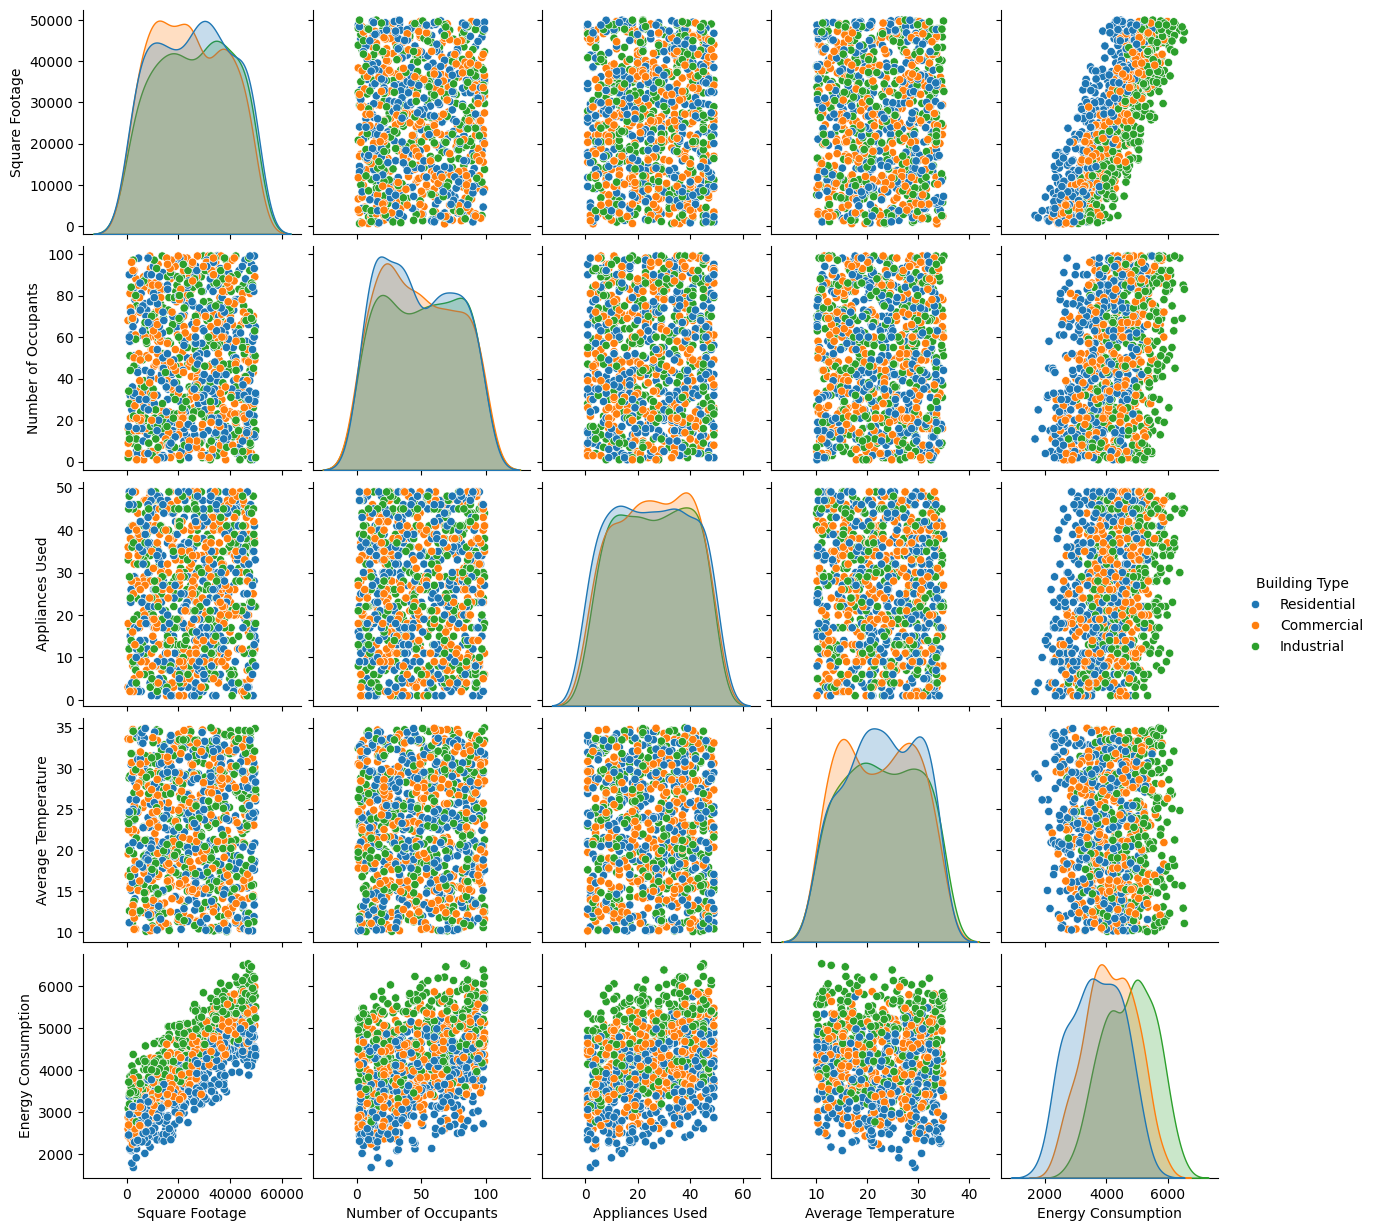

In [115]:
sns.pairplot(df, hue='Building Type', vars=numeric_cols)
plt.show()

## EDA

### Distribusi Energy Consumption

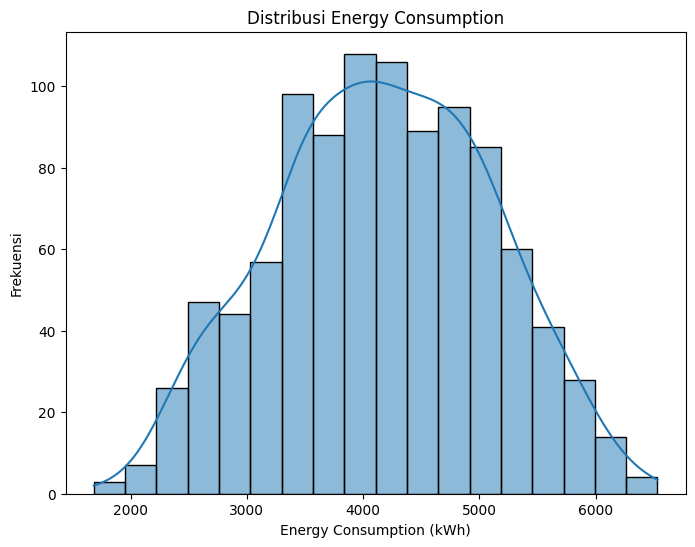

In [116]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Energy Consumption'], kde=True)
plt.title('Distribusi Energy Consumption')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Frekuensi')
plt.show()

### Relasi Energy Consumption Dengan Data Lainnya

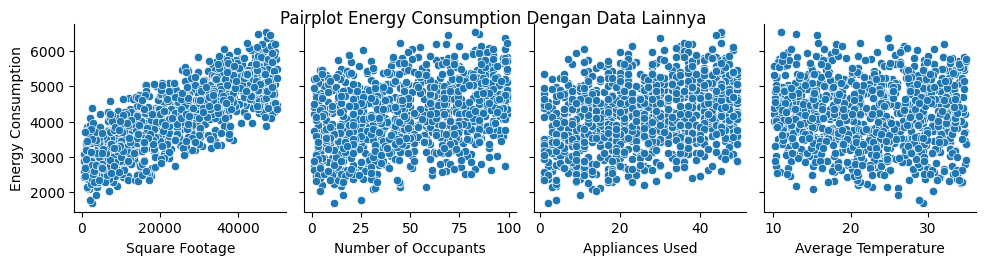

In [117]:
sns.pairplot(
    df,
    x_vars=['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature'],
    y_vars=['Energy Consumption']
)
plt.suptitle('Pairplot Energy Consumption Dengan Data Lainnya', y=1.02)
plt.show()

### Relasi Energy Consumption Dengan Building Type

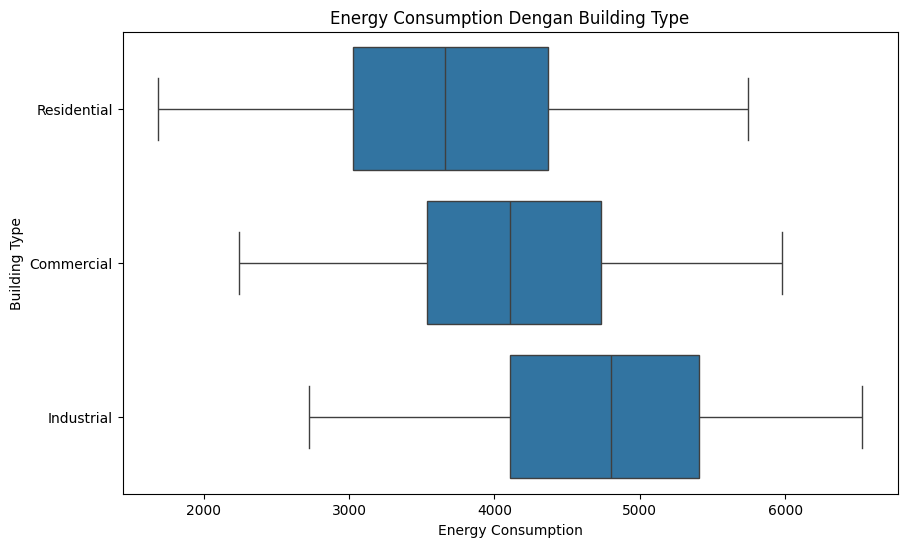

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Energy Consumption', y='Building Type')
plt.title('Energy Consumption Dengan Building Type')
plt.show()

### Relasi Energy Consumption Dengan Day of Week

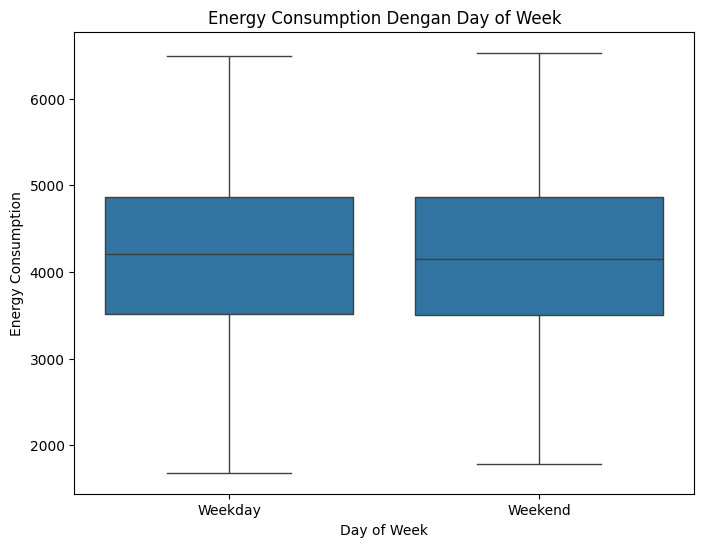

In [119]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Day of Week', y='Energy Consumption', data=df)
plt.title('Energy Consumption Dengan Day of Week')
plt.show()

### Korelasi Matrix

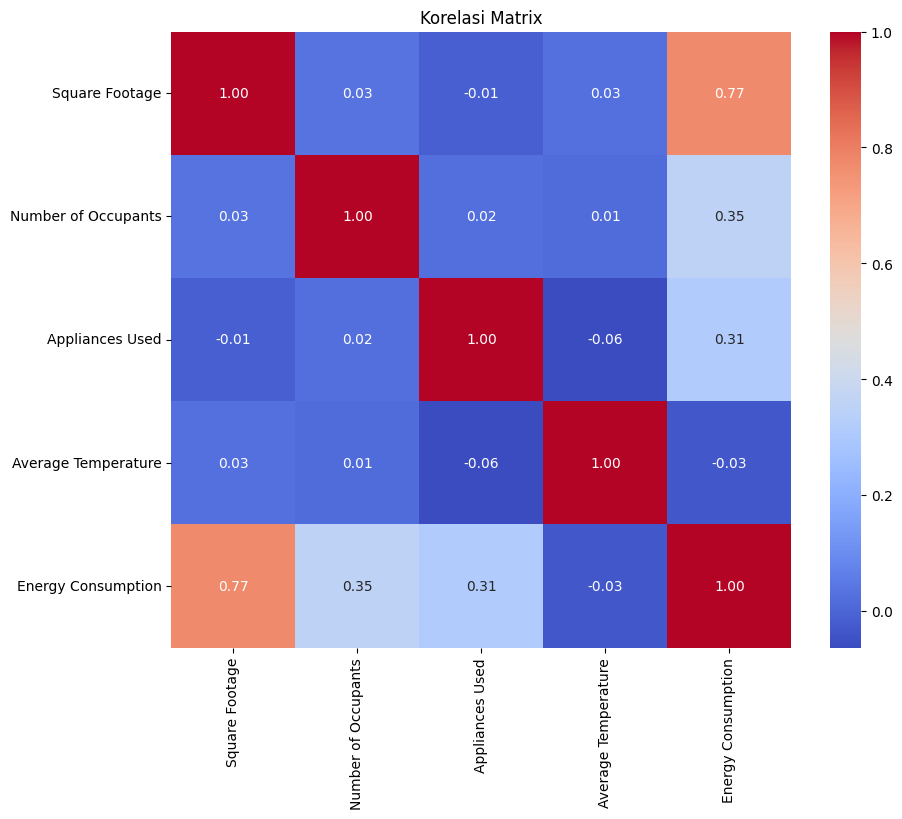

In [120]:
numerical_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Matrix')
plt.show()

# Data Pre-Processing

## Mengidentifikasi Mean-Median-Modus

In [121]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    mean = np.mean(df[col])
    median = np.median(df[col])
    mode = df[col].mode()[0] if df[col].mode().size > 0 else None

    print(f"=== {col} ===")
    print(f" Mean  : {mean}")
    print(f" Median: {median}")
    print(f" Mode  : {mode}\n")

=== Square Footage ===
 Mean  : 25462.388
 Median: 25477.0
 Mode  : 11289

=== Number of Occupants ===
 Mean  : 48.372
 Median: 47.0
 Mode  : 21

=== Appliances Used ===
 Mean  : 25.606
 Median: 26.0
 Mode  : 45

=== Average Temperature ===
 Mean  : 22.61139
 Median: 22.814999999999998
 Mode  : 16.24

=== Energy Consumption ===
 Mean  : 4166.25257
 Median: 4175.73
 Mode  : 1683.95



## Handling Dirty Data (Missing Value, Outlier, Duplicated Row)

### Missing Value

In [122]:
df.isnull().sum()

,0
Building Type,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Day of Week,0
Energy Consumption,0


### Duplicated Row

In [123]:
df.duplicated().sum()

np.int64(0)

### Outlier

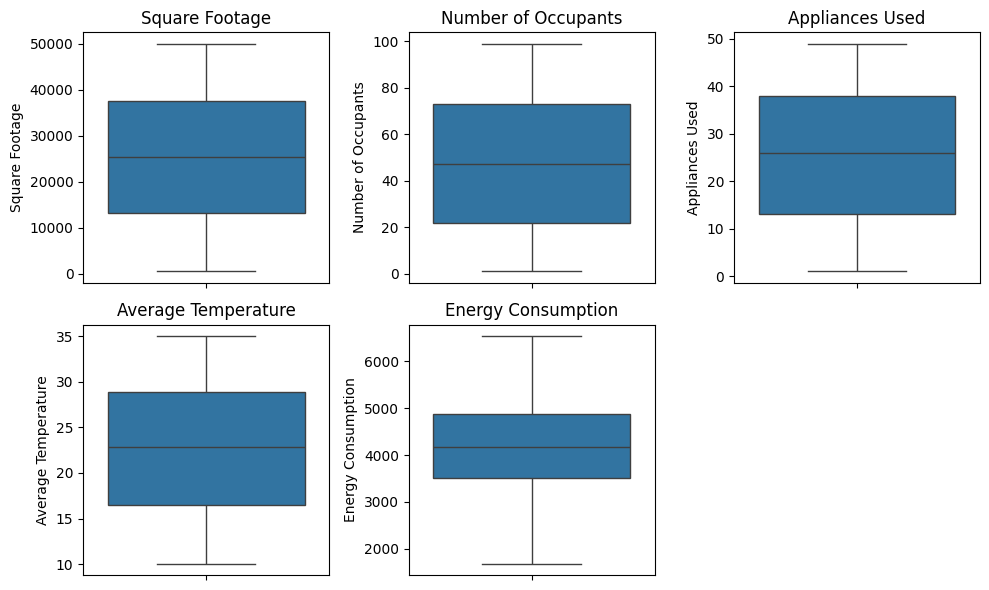

In [124]:
plt.figure(figsize=(10, 6))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Normalisasi Data

In [125]:
scaler = MinMaxScaler()

numerical_features = [
    'Square Footage',
    'Number of Occupants',
    'Appliances Used',
    'Average Temperature',
    'Energy Consumption'
]

df[numerical_features] = scaler.fit_transform(df[numerical_features])
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,0.131541,0.765306,0.187500,0.793504,Weekday,0.212518
1,Commercial,0.886219,0.663265,0.916667,0.267442,Weekday,0.837907
2,Industrial,0.378158,0.367347,0.333333,0.170409,Weekend,0.498755
3,Residential,0.256994,0.132653,0.833333,0.912991,Weekday,0.273424
4,Commercial,0.259219,0.255102,0.354167,0.074980,Weekday,0.329139
...,...,...,...,...,...,...,...
995,Residential,0.280337,0.683673,0.895833,0.557338,Weekend,0.407964
996,Industrial,0.235330,0.061224,0.437500,0.185245,Weekend,0.384263
997,Commercial,0.788923,0.887755,0.395833,0.887330,Weekday,0.714568
998,Residential,0.157534,0.673469,0.750000,0.257819,Weekend,0.322084


## Diskritisasi Data

In [126]:
features_to_discretize = [
    'Square Footage',
    'Number of Occupants',
    'Appliances Used',
    'Average Temperature',
    'Energy Consumption'
]

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

df[features_to_discretize] = discretizer.fit_transform(df[features_to_discretize])
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,0.0,3.0,0.0,3.0,Weekday,1.0
1,Commercial,4.0,3.0,4.0,1.0,Weekday,4.0
2,Industrial,1.0,1.0,1.0,0.0,Weekend,2.0
3,Residential,1.0,0.0,4.0,4.0,Weekday,1.0
4,Commercial,1.0,1.0,1.0,0.0,Weekday,1.0
...,...,...,...,...,...,...,...
995,Residential,1.0,3.0,4.0,2.0,Weekend,2.0
996,Industrial,1.0,0.0,2.0,0.0,Weekend,1.0
997,Commercial,3.0,4.0,1.0,4.0,Weekday,3.0
998,Residential,0.0,3.0,3.0,1.0,Weekend,1.0


## Feature Engineering

In [127]:
print("Missing Values:\n", df.isnull().sum())

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

print("\nMissing Values After Imputation:\n", df.isnull().sum())

df_encoded = pd.get_dummies(df, columns=['Building Type', 'Day of Week'], drop_first=True)

df_encoded.head()

Missing Values:
 Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

Missing Values After Imputation:
 Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64


,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend
0,0.0,3.0,0.0,3.0,1.0,False,True,False
1,4.0,3.0,4.0,1.0,4.0,False,False,False
2,1.0,1.0,1.0,0.0,2.0,True,False,True
3,1.0,0.0,4.0,4.0,1.0,False,True,False
4,1.0,1.0,1.0,0.0,1.0,False,False,False


## Transformasi Data

In [129]:
X = df_encoded.drop('Energy Consumption', axis=1)
y = df_encoded['Energy Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_cols = X.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Shape X_train:", X_train.shape)
print("Shape X_test :", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test :", y_test.shape)

Shape X_train: (800, 7)
Shape X_test : (200, 7)
Shape y_train: (800,)
Shape y_test : (200,)


## Basic Statistic

In [130]:
numerical_cols = df_encoded.select_dtypes(include=np.number).columns

for col in numerical_cols:
    data = df_encoded[col]
    print(f"=== {col} ===")
    print(f"Mean    : {data.mean():.4f}")
    print(f"Median  : {data.median():.4f}")
    print(f"Mode    : {data.mode()[0]:.4f}" if not data.mode().empty else "Mode: -")
    print(f"Min     : {data.min():.4f}")
    print(f"Max     : {data.max():.4f}")
    print(f"Range   : {(data.max() - data.min()):.4f}")
    print(f"Variance: {data.var():.4f}")
    print(f"Std Dev : {data.std():.4f}")
    print(f"Skewness: {skew(data):.4f}")
    print(f"Kurtosis: {kurtosis(data):.4f}\n")

print("=== Korelasi antar fitur numerik ===")
correlation_matrix = df_encoded[numerical_cols].corr()
print(correlation_matrix)

=== Square Footage ===
Mean    : 2.0160
Median  : 2.0000
Mode    : 2.0000
Min     : 0.0000
Max     : 4.0000
Range   : 4.0000
Variance: 1.9617
Std Dev : 1.4006
Skewness: -0.0110
Kurtosis: -1.2714

=== Number of Occupants ===
Mean    : 1.9370
Median  : 2.0000
Mode    : 1.0000
Min     : 0.0000
Max     : 4.0000
Range   : 4.0000
Variance: 2.0751
Std Dev : 1.4405
Skewness: 0.0741
Kurtosis: -1.3536

=== Appliances Used ===
Mean    : 2.0560
Median  : 2.0000
Mode    : 4.0000
Min     : 0.0000
Max     : 4.0000
Range   : 4.0000
Variance: 2.0169
Std Dev : 1.4202
Skewness: -0.0359
Kurtosis: -1.3183

=== Average Temperature ===
Mean    : 2.0210
Median  : 2.0000
Mode    : 3.0000
Min     : 0.0000
Max     : 4.0000
Range   : 4.0000
Variance: 1.9125
Std Dev : 1.3829
Skewness: -0.0285
Kurtosis: -1.2466

=== Energy Consumption ===
Mean    : 2.0630
Median  : 2.0000
Mode    : 2.0000
Min     : 0.0000
Max     : 4.0000
Range   : 4.0000
Variance: 1.0441
Std Dev : 1.0218
Skewness: -0.0642
Kurtosis: -0.5776

=== Ko

# Data Modeling

## Train Test Split & Memilih Fitur/Kolom

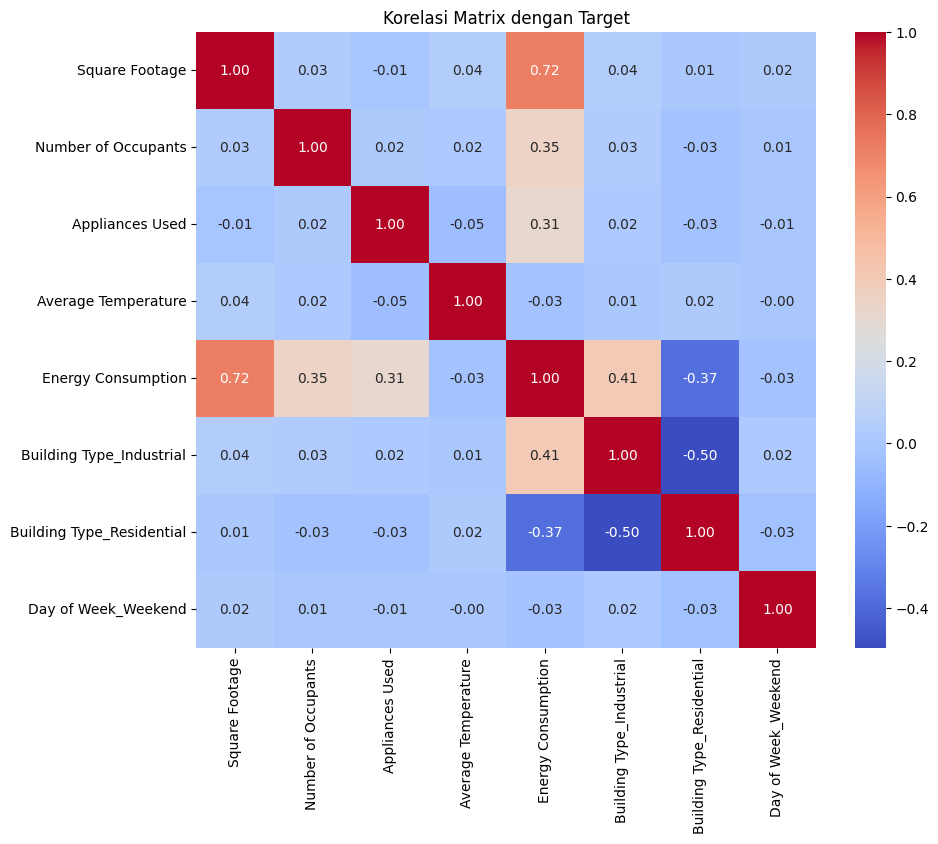


Korelasi fitur dengan target 'Energy Consumption':
 Square Footage               0.716922
Building Type_Industrial     0.406194
Number of Occupants          0.346811
Appliances Used              0.311429
Day of Week_Weekend         -0.025576
Average Temperature         -0.025731
Building Type_Residential   -0.374084
Name: Energy Consumption, dtype: float64

Fitur terpilih: ['Square Footage', 'Building Type_Industrial', 'Number of Occupants', 'Appliances Used', 'Building Type_Residential']

Shape Data:
X_train: (800, 5)
X_test : (200, 5)
y_train: (800,)
y_test : (200,)


In [132]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Matrix dengan Target')
plt.show()

target = 'Energy Consumption'
cor_target = correlation_matrix[target].drop(target).sort_values(ascending=False)
print("\nKorelasi fitur dengan target 'Energy Consumption':\n", cor_target)

selected_features = cor_target[abs(cor_target) > 0.3].index.tolist()
print("\nFitur terpilih:", selected_features)

X = df_encoded[selected_features]
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape Data:")
print(f"X_train: {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test : {y_test.shape}")

## Membuat Model (Supervised Learning)

In [133]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

## Basic Linear Regression dan Mengukur Akurasi

In [135]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== Evaluasi Model Linear Regression ===")
print(f"MAE  (Mean Absolute Error)    : {mae:.4f}")
print(f"MSE  (Mean Squared Error)     : {mse:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"R²   (R-squared / Coefficient of Determination): {r2:.4f}")

=== Evaluasi Model Linear Regression ===
MAE  (Mean Absolute Error)    : 0.2941
MSE  (Mean Squared Error)     : 0.1216
RMSE (Root Mean Squared Error): 0.3488
R²   (R-squared / Coefficient of Determination): 0.8759


Menampilkan Koefisien Energi

In [136]:
print("=== Koefisien Linear Regression ===")
for feature, coef in zip(X_train.columns, model_lr.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {model_lr.intercept_:.4f}")

=== Koefisien Linear Regression ===
Square Footage: 0.5151
Building Type_Industrial: 0.5335
Number of Occupants: 0.2182
Appliances Used: 0.2143
Building Type_Residential: -0.5258

Intercept: 0.1779


Visualisasi Antara Prediksi dengan Aktual

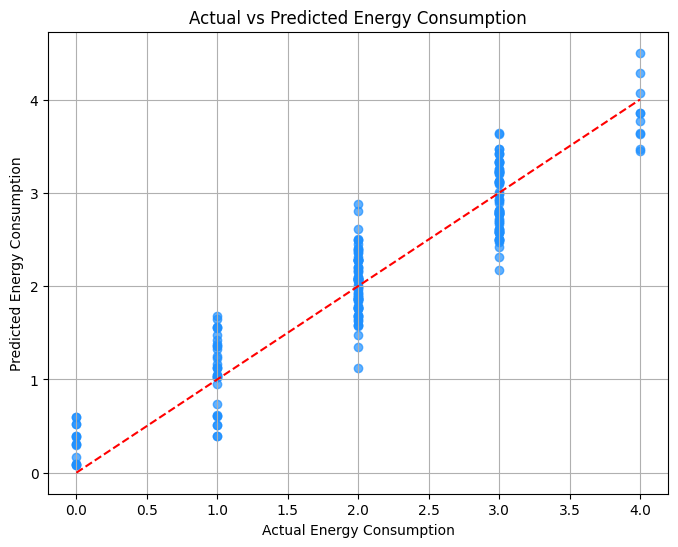

In [137]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption')
plt.grid(True)
plt.show()

# Model Evaluation

## Confusion Matrix Method


In [139]:
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_class = discretizer.fit_transform(df[['Energy Consumption']]).astype(int).ravel()

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

In [140]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)

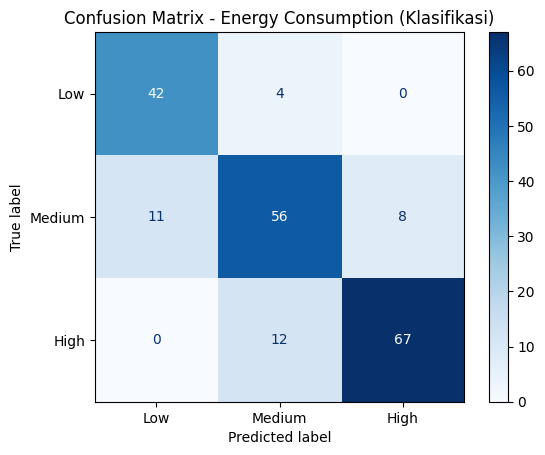


=== Classification Report ===
              precision    recall  f1-score   support

         Low       0.79      0.91      0.85        46
      Medium       0.78      0.75      0.76        75
        High       0.89      0.85      0.87        79

    accuracy                           0.82       200
   macro avg       0.82      0.84      0.83       200
weighted avg       0.83      0.82      0.82       200



In [141]:
cm = confusion_matrix(y_test_cls, y_pred_cls)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High"])

disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Energy Consumption (Klasifikasi)")
plt.show()

print("\n=== Classification Report ===")
print(classification_report(y_test_cls, y_pred_cls, target_names=["Low", "Medium", "High"]))

## Cross Validation

In [142]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print("=== Cross Validation Scores (R²) ===")
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nMean R² Score: {np.mean(scores):.4f}")
print(f"Std Dev      : {np.std(scores):.4f}")

=== Cross Validation Scores (R²) ===
Fold 1: 0.8759
Fold 2: 0.8621
Fold 3: 0.9150
Fold 4: 0.8938
Fold 5: 0.9007

Mean R² Score: 0.8895
Std Dev      : 0.0186


## Mengidentifikasi Underfit/Overfit

In [146]:
model_check = LinearRegression()
model_check.fit(X_train, y_train)

y_train_pred = model_check.predict(X_train)
y_test_pred = model_check.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("=== Evaluasi untuk Deteksi Underfit/Overfit ===")
print(f"R² Score pada Data Training: {r2_train:.4f}")
print(f"R² Score pada Data Test    : {r2_test:.4f}")

if r2_train > 0.9 and r2_test < 0.7:
    print(" Model kemungkinan Overfit!")
elif r2_train < 0.5 and r2_test < 0.5:
    print(" Model kemungkinan Underfit!")
else:
    print("Model dalam kondisi baik (tidak underfit/overfit)")

=== Evaluasi untuk Deteksi Underfit/Overfit ===
R² Score pada Data Training: 0.8961
R² Score pada Data Test    : 0.8759
Model dalam kondisi baik (tidak underfit/overfit)


## Mengevaluasi Semua Tahapan

In [147]:
print("========== EVALUASI AKHIR MODEL ==========\n")

print("METRIK REGRESI (Linear Regression)")
print(f"R² Score (Train): {r2_score(y_train, y_train_pred):.4f}")
print(f"R² Score (Test) : {r2_score(y_test, y_test_pred):.4f}")
print(f"MAE             : {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE             : {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE            : {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}\n")

print("CROSS VALIDATION (5-Fold - R² Score)")
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: {score:.4f}")
print(f"Mean CV Score  : {np.mean(scores):.4f}")
print(f"Std CV Score   : {np.std(scores):.4f}\n")

print("DIAGNOSIS MODEL:")
if r2_train > 0.9 and r2_test < 0.7:
    print("Terindikasi Overfit")
elif r2_train < 0.5 and r2_test < 0.5:
    print("Terindikasi Underfit")
else:
    print("Model Seimbang (tidak underfit/overfit)\n")

print("EVALUASI KLASIFIKASI (Confusion Matrix + Classification Report):")
print(classification_report(y_test_cls, y_pred_cls, target_names=["Low", "Medium", "High"]))

========== EVALUASI AKHIR MODEL ==========

METRIK REGRESI (Linear Regression)
R² Score (Train): 0.8961
R² Score (Test) : 0.8759
MAE             : 0.2941
MSE             : 0.1216
RMSE            : 0.3488

CROSS VALIDATION (5-Fold - R² Score)
Fold 1: 0.8759
Fold 2: 0.8621
Fold 3: 0.9150
Fold 4: 0.8938
Fold 5: 0.9007
Mean CV Score  : 0.8895
Std CV Score   : 0.0186

DIAGNOSIS MODEL:
Model Seimbang (tidak underfit/overfit)

EVALUASI KLASIFIKASI (Confusion Matrix + Classification Report):
              precision    recall  f1-score   support

         Low       0.79      0.91      0.85        46
      Medium       0.78      0.75      0.76        75
        High       0.89      0.85      0.87        79

    accuracy                           0.82       200
   macro avg       0.82      0.84      0.83       200
weighted avg       0.83      0.82      0.82       200

